In [ ]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 80.3MB 48kB/s 
     |████████████████████████████████| 419kB 46.9MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 3.0MB 25.8MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 2.0.0a0 which is incompatible.
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [9]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# https://www.kaggle.com/c/dogs-vs-cats/data
train_file = "/content/drive/My Drive/Colab Notebooks/train.zip"

In [12]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall()

In [18]:
import os 
trian_path = "./train"
os.listdir(trian_path)

['cat.4094.jpg',
 'dog.3100.jpg',
 'cat.9206.jpg',
 'dog.8870.jpg',
 'cat.8772.jpg',
 'cat.9101.jpg',
 'dog.9932.jpg',
 'dog.2958.jpg',
 'cat.5992.jpg',
 'cat.11663.jpg',
 'dog.3501.jpg',
 'cat.2834.jpg',
 'cat.11533.jpg',
 'dog.8341.jpg',
 'dog.7908.jpg',
 'dog.7237.jpg',
 'cat.7757.jpg',
 'dog.12218.jpg',
 'dog.990.jpg',
 'cat.6851.jpg',
 'dog.7731.jpg',
 'cat.8844.jpg',
 'dog.7273.jpg',
 'dog.7700.jpg',
 'dog.2762.jpg',
 'cat.11384.jpg',
 'cat.1873.jpg',
 'cat.10769.jpg',
 'cat.11969.jpg',
 'dog.2693.jpg',
 'dog.8519.jpg',
 'dog.8877.jpg',
 'dog.11889.jpg',
 'cat.628.jpg',
 'dog.2631.jpg',
 'cat.7281.jpg',
 'dog.8233.jpg',
 'dog.12096.jpg',
 'dog.3382.jpg',
 'cat.8619.jpg',
 'dog.846.jpg',
 'dog.8470.jpg',
 'cat.1544.jpg',
 'cat.1332.jpg',
 'cat.7708.jpg',
 'cat.6785.jpg',
 'dog.5856.jpg',
 'dog.4732.jpg',
 'cat.6876.jpg',
 'cat.7413.jpg',
 'cat.948.jpg',
 'cat.4508.jpg',
 'dog.8758.jpg',
 'dog.9313.jpg',
 'cat.1998.jpg',
 'cat.486.jpg',
 'cat.4127.jpg',
 'dog.8176.jpg',
 'dog.3223.

In [19]:
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "dog" in file_name else 0

train_path = "./train/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [20]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

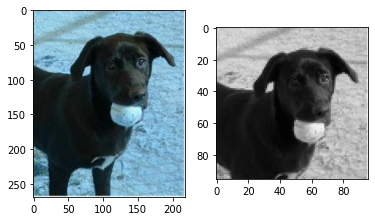

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 21000
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [22]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [23]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(25000, 96, 96, 1) (25000,)


In [ ]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=5, batch_size=50)
model.save_weights("model.tf")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Tensorflow: 2.0.0-alpha0
Epoch 1/5
 4150/25000 [===>..........................] - ETA: 3:32 - loss: 0.6952 - sparse_categorical_accuracy: 0.5075

In [ ]:
from google.colab import files
uploads = files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg
Saving 17.jpg to 17.jpg
Saving 18.jpg to 18.jpg
Saving 19.jpg to 19.jpg
Saving 20.jpg to 20.jpg


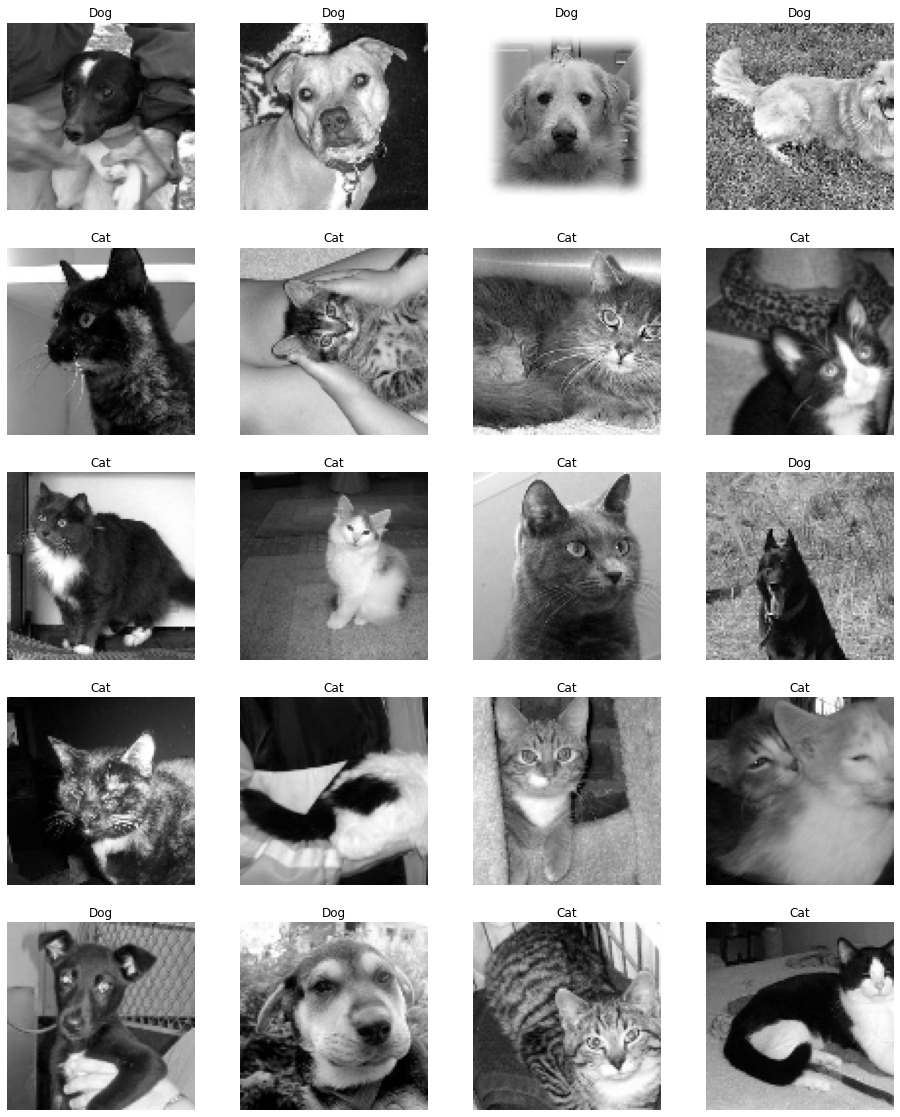

In [ ]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(10):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title("Dog" if np.argmax(eval_predictions[i])==1 else "Cat")
    plt.axis('off')